## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.1ms	remaining: 52.1s
1:	learn: 0.9301086	total: 56.1ms	remaining: 28s
2:	learn: 0.9005637	total: 59ms	remaining: 19.6s
3:	learn: 0.8720983	total: 62.1ms	remaining: 15.5s
4:	learn: 0.8467410	total: 65.6ms	remaining: 13.1s
5:	learn: 0.8226672	total: 68.4ms	remaining: 11.3s
6:	learn: 0.7994702	total: 71.2ms	remaining: 10.1s
7:	learn: 0.7784272	total: 74.1ms	remaining: 9.19s
8:	learn: 0.7602192	total: 76.9ms	remaining: 8.47s
9:	learn: 0.7412421	total: 79.8ms	remaining: 7.89s
10:	learn: 0.7247930	total: 82.6ms	remaining: 7.43s
11:	learn: 0.7089951	total: 86.4ms	remaining: 7.12s
12:	learn: 0.6951345	total: 89.2ms	remaining: 6.78s
13:	learn: 0.6809276	total: 92.1ms	remaining: 6.49s
14:	learn: 0.6692630	total: 94.9ms	remaining: 6.23s
15:	learn: 0.6588323	total: 97.7ms	remaining: 6.01s
16:	learn: 0.6472700	total: 100ms	remaining: 5.81s
17:	learn: 0.6379982	total: 103ms	remaining: 5.64s
18:	learn: 0.6294674	total: 106ms	remaining: 5.48s

37:	learn: 0.5296892	total: 176ms	remaining: 4.46s
38:	learn: 0.5255485	total: 179ms	remaining: 4.41s
39:	learn: 0.5217941	total: 182ms	remaining: 4.36s
40:	learn: 0.5196440	total: 184ms	remaining: 4.31s
41:	learn: 0.5170220	total: 187ms	remaining: 4.26s
42:	learn: 0.5141148	total: 189ms	remaining: 4.21s
43:	learn: 0.5116444	total: 192ms	remaining: 4.17s
44:	learn: 0.5100547	total: 195ms	remaining: 4.13s
45:	learn: 0.5069096	total: 197ms	remaining: 4.09s
46:	learn: 0.5051685	total: 200ms	remaining: 4.06s
47:	learn: 0.5033968	total: 203ms	remaining: 4.02s
48:	learn: 0.5012433	total: 205ms	remaining: 3.99s
49:	learn: 0.4986132	total: 208ms	remaining: 3.96s
50:	learn: 0.4968022	total: 211ms	remaining: 3.92s
51:	learn: 0.4951632	total: 214ms	remaining: 3.89s
52:	learn: 0.4928924	total: 216ms	remaining: 3.86s
53:	learn: 0.4917272	total: 219ms	remaining: 3.84s
54:	learn: 0.4895079	total: 222ms	remaining: 3.81s
55:	learn: 0.4881884	total: 224ms	remaining: 3.78s
56:	learn: 0.4861566	total: 227

104:	learn: 0.4461730	total: 367ms	remaining: 3.13s
105:	learn: 0.4457259	total: 370ms	remaining: 3.12s
106:	learn: 0.4451085	total: 373ms	remaining: 3.11s
107:	learn: 0.4447909	total: 376ms	remaining: 3.1s
108:	learn: 0.4440936	total: 379ms	remaining: 3.09s
109:	learn: 0.4435519	total: 382ms	remaining: 3.09s
110:	learn: 0.4431075	total: 385ms	remaining: 3.08s
111:	learn: 0.4425498	total: 387ms	remaining: 3.07s
112:	learn: 0.4419106	total: 390ms	remaining: 3.06s
113:	learn: 0.4414425	total: 393ms	remaining: 3.05s
114:	learn: 0.4407446	total: 396ms	remaining: 3.04s
115:	learn: 0.4402011	total: 398ms	remaining: 3.03s
116:	learn: 0.4398559	total: 401ms	remaining: 3.02s
117:	learn: 0.4392990	total: 404ms	remaining: 3.02s
118:	learn: 0.4389153	total: 406ms	remaining: 3.01s
119:	learn: 0.4383331	total: 409ms	remaining: 3s
120:	learn: 0.4378136	total: 411ms	remaining: 2.99s
121:	learn: 0.4375553	total: 414ms	remaining: 2.98s
122:	learn: 0.4369995	total: 417ms	remaining: 2.97s
123:	learn: 0.43

173:	learn: 0.4148857	total: 557ms	remaining: 2.65s
174:	learn: 0.4144190	total: 560ms	remaining: 2.64s
175:	learn: 0.4140875	total: 563ms	remaining: 2.63s
176:	learn: 0.4136755	total: 565ms	remaining: 2.63s
177:	learn: 0.4133860	total: 568ms	remaining: 2.62s
178:	learn: 0.4129780	total: 570ms	remaining: 2.62s
179:	learn: 0.4122907	total: 573ms	remaining: 2.61s
180:	learn: 0.4119188	total: 576ms	remaining: 2.61s
181:	learn: 0.4115412	total: 579ms	remaining: 2.6s
182:	learn: 0.4112620	total: 582ms	remaining: 2.6s
183:	learn: 0.4107734	total: 585ms	remaining: 2.59s
184:	learn: 0.4104881	total: 587ms	remaining: 2.59s
185:	learn: 0.4100009	total: 590ms	remaining: 2.58s
186:	learn: 0.4096453	total: 593ms	remaining: 2.58s
187:	learn: 0.4093395	total: 596ms	remaining: 2.57s
188:	learn: 0.4090020	total: 599ms	remaining: 2.57s
189:	learn: 0.4085981	total: 602ms	remaining: 2.57s
190:	learn: 0.4082397	total: 606ms	remaining: 2.56s
191:	learn: 0.4079846	total: 609ms	remaining: 2.56s
192:	learn: 0.

236:	learn: 0.3941497	total: 749ms	remaining: 2.41s
237:	learn: 0.3939819	total: 752ms	remaining: 2.41s
238:	learn: 0.3938322	total: 755ms	remaining: 2.4s
239:	learn: 0.3935463	total: 758ms	remaining: 2.4s
240:	learn: 0.3933166	total: 761ms	remaining: 2.4s
241:	learn: 0.3930992	total: 764ms	remaining: 2.39s
242:	learn: 0.3928898	total: 766ms	remaining: 2.39s
243:	learn: 0.3926199	total: 769ms	remaining: 2.38s
244:	learn: 0.3923955	total: 772ms	remaining: 2.38s
245:	learn: 0.3922312	total: 775ms	remaining: 2.38s
246:	learn: 0.3919499	total: 778ms	remaining: 2.37s
247:	learn: 0.3917420	total: 781ms	remaining: 2.37s
248:	learn: 0.3915186	total: 783ms	remaining: 2.36s
249:	learn: 0.3912759	total: 786ms	remaining: 2.36s
250:	learn: 0.3908375	total: 789ms	remaining: 2.35s
251:	learn: 0.3904815	total: 792ms	remaining: 2.35s
252:	learn: 0.3902127	total: 795ms	remaining: 2.35s
253:	learn: 0.3900274	total: 798ms	remaining: 2.34s
254:	learn: 0.3898171	total: 801ms	remaining: 2.34s
255:	learn: 0.3

298:	learn: 0.3797228	total: 943ms	remaining: 2.21s
299:	learn: 0.3795554	total: 946ms	remaining: 2.21s
300:	learn: 0.3793733	total: 950ms	remaining: 2.21s
301:	learn: 0.3791607	total: 952ms	remaining: 2.2s
302:	learn: 0.3789297	total: 956ms	remaining: 2.2s
303:	learn: 0.3787482	total: 959ms	remaining: 2.19s
304:	learn: 0.3786528	total: 961ms	remaining: 2.19s
305:	learn: 0.3784406	total: 965ms	remaining: 2.19s
306:	learn: 0.3782934	total: 968ms	remaining: 2.18s
307:	learn: 0.3781631	total: 971ms	remaining: 2.18s
308:	learn: 0.3779278	total: 974ms	remaining: 2.18s
309:	learn: 0.3777358	total: 977ms	remaining: 2.17s
310:	learn: 0.3775809	total: 979ms	remaining: 2.17s
311:	learn: 0.3774323	total: 982ms	remaining: 2.17s
312:	learn: 0.3772732	total: 985ms	remaining: 2.16s
313:	learn: 0.3771184	total: 988ms	remaining: 2.16s
314:	learn: 0.3769370	total: 991ms	remaining: 2.15s
315:	learn: 0.3766643	total: 994ms	remaining: 2.15s
316:	learn: 0.3764891	total: 997ms	remaining: 2.15s
317:	learn: 0.

364:	learn: 0.3679761	total: 1.13s	remaining: 1.97s
365:	learn: 0.3677932	total: 1.14s	remaining: 1.97s
366:	learn: 0.3676022	total: 1.14s	remaining: 1.97s
367:	learn: 0.3674148	total: 1.14s	remaining: 1.96s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.96s
369:	learn: 0.3671985	total: 1.15s	remaining: 1.96s
370:	learn: 0.3670563	total: 1.15s	remaining: 1.95s
371:	learn: 0.3669128	total: 1.15s	remaining: 1.95s
372:	learn: 0.3668381	total: 1.17s	remaining: 1.97s
373:	learn: 0.3666564	total: 1.17s	remaining: 1.97s
374:	learn: 0.3663789	total: 1.2s	remaining: 2s
375:	learn: 0.3661576	total: 1.2s	remaining: 1.99s
376:	learn: 0.3659742	total: 1.2s	remaining: 1.99s
377:	learn: 0.3658330	total: 1.21s	remaining: 1.99s
378:	learn: 0.3656680	total: 1.21s	remaining: 1.98s
379:	learn: 0.3654606	total: 1.21s	remaining: 1.98s
380:	learn: 0.3651842	total: 1.22s	remaining: 1.98s
381:	learn: 0.3650538	total: 1.22s	remaining: 1.97s
382:	learn: 0.3649246	total: 1.22s	remaining: 1.97s
383:	learn: 0.3647

415:	learn: 0.3595791	total: 1.33s	remaining: 1.86s
416:	learn: 0.3594487	total: 1.33s	remaining: 1.86s
417:	learn: 0.3592759	total: 1.33s	remaining: 1.86s
418:	learn: 0.3591088	total: 1.34s	remaining: 1.85s
419:	learn: 0.3589470	total: 1.34s	remaining: 1.85s
420:	learn: 0.3587972	total: 1.34s	remaining: 1.85s
421:	learn: 0.3586831	total: 1.34s	remaining: 1.84s
422:	learn: 0.3585620	total: 1.35s	remaining: 1.84s
423:	learn: 0.3584427	total: 1.35s	remaining: 1.83s
424:	learn: 0.3583044	total: 1.35s	remaining: 1.83s
425:	learn: 0.3581698	total: 1.36s	remaining: 1.83s
426:	learn: 0.3580461	total: 1.36s	remaining: 1.82s
427:	learn: 0.3579182	total: 1.36s	remaining: 1.82s
428:	learn: 0.3577521	total: 1.37s	remaining: 1.82s
429:	learn: 0.3576138	total: 1.37s	remaining: 1.81s
430:	learn: 0.3575528	total: 1.37s	remaining: 1.81s
431:	learn: 0.3574686	total: 1.37s	remaining: 1.81s
432:	learn: 0.3572923	total: 1.38s	remaining: 1.8s
433:	learn: 0.3571859	total: 1.38s	remaining: 1.8s
434:	learn: 0.

479:	learn: 0.3506003	total: 1.53s	remaining: 1.66s
480:	learn: 0.3505111	total: 1.54s	remaining: 1.66s
481:	learn: 0.3503906	total: 1.54s	remaining: 1.65s
482:	learn: 0.3501522	total: 1.54s	remaining: 1.65s
483:	learn: 0.3500494	total: 1.54s	remaining: 1.65s
484:	learn: 0.3498921	total: 1.55s	remaining: 1.64s
485:	learn: 0.3497143	total: 1.55s	remaining: 1.64s
486:	learn: 0.3496172	total: 1.55s	remaining: 1.64s
487:	learn: 0.3494609	total: 1.56s	remaining: 1.63s
488:	learn: 0.3493200	total: 1.56s	remaining: 1.63s
489:	learn: 0.3491550	total: 1.56s	remaining: 1.63s
490:	learn: 0.3490323	total: 1.56s	remaining: 1.62s
491:	learn: 0.3488767	total: 1.57s	remaining: 1.62s
492:	learn: 0.3487285	total: 1.57s	remaining: 1.61s
493:	learn: 0.3486318	total: 1.57s	remaining: 1.61s
494:	learn: 0.3485016	total: 1.58s	remaining: 1.61s
495:	learn: 0.3484072	total: 1.58s	remaining: 1.6s
496:	learn: 0.3482698	total: 1.58s	remaining: 1.6s
497:	learn: 0.3481630	total: 1.59s	remaining: 1.6s
498:	learn: 0.3

532:	learn: 0.3437049	total: 1.69s	remaining: 1.48s
533:	learn: 0.3435053	total: 1.69s	remaining: 1.48s
534:	learn: 0.3433236	total: 1.7s	remaining: 1.48s
535:	learn: 0.3432219	total: 1.7s	remaining: 1.47s
536:	learn: 0.3431615	total: 1.7s	remaining: 1.47s
537:	learn: 0.3430198	total: 1.71s	remaining: 1.47s
538:	learn: 0.3429422	total: 1.71s	remaining: 1.46s
539:	learn: 0.3428024	total: 1.71s	remaining: 1.46s
540:	learn: 0.3426641	total: 1.72s	remaining: 1.46s
541:	learn: 0.3425885	total: 1.72s	remaining: 1.45s
542:	learn: 0.3424695	total: 1.72s	remaining: 1.45s
543:	learn: 0.3423997	total: 1.73s	remaining: 1.45s
544:	learn: 0.3422315	total: 1.73s	remaining: 1.44s
545:	learn: 0.3421242	total: 1.73s	remaining: 1.44s
546:	learn: 0.3419673	total: 1.73s	remaining: 1.44s
547:	learn: 0.3418121	total: 1.74s	remaining: 1.43s
548:	learn: 0.3416228	total: 1.74s	remaining: 1.43s
549:	learn: 0.3414331	total: 1.74s	remaining: 1.43s
550:	learn: 0.3413090	total: 1.75s	remaining: 1.42s
551:	learn: 0.3

591:	learn: 0.3371913	total: 1.88s	remaining: 1.3s
592:	learn: 0.3371272	total: 1.89s	remaining: 1.29s
593:	learn: 0.3370368	total: 1.89s	remaining: 1.29s
594:	learn: 0.3368150	total: 1.89s	remaining: 1.29s
595:	learn: 0.3367491	total: 1.9s	remaining: 1.28s
596:	learn: 0.3366496	total: 1.9s	remaining: 1.28s
597:	learn: 0.3365561	total: 1.9s	remaining: 1.28s
598:	learn: 0.3364801	total: 1.9s	remaining: 1.27s
599:	learn: 0.3363937	total: 1.91s	remaining: 1.27s
600:	learn: 0.3363054	total: 1.91s	remaining: 1.27s
601:	learn: 0.3361892	total: 1.91s	remaining: 1.26s
602:	learn: 0.3360683	total: 1.92s	remaining: 1.26s
603:	learn: 0.3359807	total: 1.92s	remaining: 1.26s
604:	learn: 0.3359096	total: 1.92s	remaining: 1.25s
605:	learn: 0.3358268	total: 1.92s	remaining: 1.25s
606:	learn: 0.3356597	total: 1.93s	remaining: 1.25s
607:	learn: 0.3355448	total: 1.93s	remaining: 1.24s
608:	learn: 0.3354512	total: 1.93s	remaining: 1.24s
609:	learn: 0.3353398	total: 1.94s	remaining: 1.24s
610:	learn: 0.335

652:	learn: 0.3309129	total: 2.08s	remaining: 1.1s
653:	learn: 0.3308321	total: 2.08s	remaining: 1.1s
654:	learn: 0.3307342	total: 2.08s	remaining: 1.1s
655:	learn: 0.3306809	total: 2.08s	remaining: 1.09s
656:	learn: 0.3305729	total: 2.09s	remaining: 1.09s
657:	learn: 0.3304900	total: 2.09s	remaining: 1.09s
658:	learn: 0.3303842	total: 2.09s	remaining: 1.08s
659:	learn: 0.3302235	total: 2.1s	remaining: 1.08s
660:	learn: 0.3300983	total: 2.1s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.1s	remaining: 1.07s
662:	learn: 0.3299184	total: 2.1s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.11s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.11s	remaining: 1.06s
665:	learn: 0.3296671	total: 2.11s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.13s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.13s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.13s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.14s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.14s	remaining: 1.05s
671:	learn: 0.32899

711:	learn: 0.3254442	total: 2.27s	remaining: 917ms
712:	learn: 0.3253361	total: 2.27s	remaining: 914ms
713:	learn: 0.3252431	total: 2.27s	remaining: 910ms
714:	learn: 0.3251186	total: 2.27s	remaining: 907ms
715:	learn: 0.3250323	total: 2.28s	remaining: 903ms
716:	learn: 0.3249511	total: 2.28s	remaining: 900ms
717:	learn: 0.3248372	total: 2.28s	remaining: 897ms
718:	learn: 0.3247371	total: 2.29s	remaining: 893ms
719:	learn: 0.3246676	total: 2.29s	remaining: 890ms
720:	learn: 0.3245862	total: 2.29s	remaining: 887ms
721:	learn: 0.3245270	total: 2.29s	remaining: 883ms
722:	learn: 0.3244558	total: 2.3s	remaining: 880ms
723:	learn: 0.3243835	total: 2.3s	remaining: 877ms
724:	learn: 0.3242957	total: 2.3s	remaining: 873ms
725:	learn: 0.3242628	total: 2.3s	remaining: 870ms
726:	learn: 0.3242076	total: 2.31s	remaining: 866ms
727:	learn: 0.3240923	total: 2.31s	remaining: 863ms
728:	learn: 0.3240148	total: 2.31s	remaining: 860ms
729:	learn: 0.3239014	total: 2.31s	remaining: 856ms
730:	learn: 0.32

778:	learn: 0.3194714	total: 2.46s	remaining: 697ms
779:	learn: 0.3194042	total: 2.46s	remaining: 694ms
780:	learn: 0.3193209	total: 2.46s	remaining: 691ms
781:	learn: 0.3192009	total: 2.46s	remaining: 687ms
782:	learn: 0.3191109	total: 2.47s	remaining: 684ms
783:	learn: 0.3190255	total: 2.47s	remaining: 681ms
784:	learn: 0.3189403	total: 2.47s	remaining: 678ms
785:	learn: 0.3188715	total: 2.48s	remaining: 674ms
786:	learn: 0.3188016	total: 2.48s	remaining: 671ms
787:	learn: 0.3187670	total: 2.48s	remaining: 668ms
788:	learn: 0.3186601	total: 2.48s	remaining: 665ms
789:	learn: 0.3185886	total: 2.49s	remaining: 661ms
790:	learn: 0.3185418	total: 2.49s	remaining: 658ms
791:	learn: 0.3184514	total: 2.49s	remaining: 655ms
792:	learn: 0.3183529	total: 2.5s	remaining: 652ms
793:	learn: 0.3182569	total: 2.5s	remaining: 649ms
794:	learn: 0.3181932	total: 2.5s	remaining: 646ms
795:	learn: 0.3180848	total: 2.51s	remaining: 643ms
796:	learn: 0.3180327	total: 2.51s	remaining: 640ms
797:	learn: 0.3

844:	learn: 0.3140919	total: 2.65s	remaining: 486ms
845:	learn: 0.3140384	total: 2.65s	remaining: 482ms
846:	learn: 0.3139822	total: 2.65s	remaining: 479ms
847:	learn: 0.3138839	total: 2.66s	remaining: 476ms
848:	learn: 0.3138291	total: 2.66s	remaining: 473ms
849:	learn: 0.3137772	total: 2.66s	remaining: 470ms
850:	learn: 0.3137138	total: 2.67s	remaining: 467ms
851:	learn: 0.3136859	total: 2.67s	remaining: 464ms
852:	learn: 0.3136054	total: 2.67s	remaining: 461ms
853:	learn: 0.3135239	total: 2.68s	remaining: 458ms
854:	learn: 0.3134711	total: 2.68s	remaining: 455ms
855:	learn: 0.3134242	total: 2.68s	remaining: 451ms
856:	learn: 0.3133249	total: 2.69s	remaining: 448ms
857:	learn: 0.3132311	total: 2.69s	remaining: 445ms
858:	learn: 0.3131446	total: 2.69s	remaining: 442ms
859:	learn: 0.3130587	total: 2.69s	remaining: 438ms
860:	learn: 0.3129229	total: 2.7s	remaining: 435ms
861:	learn: 0.3128651	total: 2.7s	remaining: 433ms
862:	learn: 0.3127812	total: 2.71s	remaining: 430ms
863:	learn: 0.

906:	learn: 0.3095878	total: 2.84s	remaining: 291ms
907:	learn: 0.3095154	total: 2.84s	remaining: 288ms
908:	learn: 0.3094688	total: 2.85s	remaining: 285ms
909:	learn: 0.3093784	total: 2.85s	remaining: 282ms
910:	learn: 0.3093058	total: 2.85s	remaining: 279ms
911:	learn: 0.3092574	total: 2.85s	remaining: 275ms
912:	learn: 0.3092023	total: 2.86s	remaining: 272ms
913:	learn: 0.3091306	total: 2.86s	remaining: 269ms
914:	learn: 0.3090719	total: 2.86s	remaining: 266ms
915:	learn: 0.3090199	total: 2.87s	remaining: 263ms
916:	learn: 0.3089417	total: 2.87s	remaining: 260ms
917:	learn: 0.3088562	total: 2.87s	remaining: 256ms
918:	learn: 0.3087578	total: 2.87s	remaining: 253ms
919:	learn: 0.3086793	total: 2.88s	remaining: 250ms
920:	learn: 0.3086255	total: 2.88s	remaining: 247ms
921:	learn: 0.3085073	total: 2.88s	remaining: 244ms
922:	learn: 0.3084388	total: 2.89s	remaining: 241ms
923:	learn: 0.3083752	total: 2.89s	remaining: 238ms
924:	learn: 0.3082889	total: 2.89s	remaining: 235ms
925:	learn: 

963:	learn: 0.3052664	total: 3.03s	remaining: 113ms
964:	learn: 0.3052264	total: 3.03s	remaining: 110ms
965:	learn: 0.3051873	total: 3.03s	remaining: 107ms
966:	learn: 0.3051018	total: 3.04s	remaining: 104ms
967:	learn: 0.3050172	total: 3.04s	remaining: 101ms
968:	learn: 0.3049470	total: 3.04s	remaining: 97.4ms
969:	learn: 0.3049028	total: 3.05s	remaining: 94.2ms
970:	learn: 0.3048446	total: 3.05s	remaining: 91.1ms
971:	learn: 0.3047712	total: 3.05s	remaining: 87.9ms
972:	learn: 0.3047313	total: 3.06s	remaining: 84.8ms
973:	learn: 0.3046600	total: 3.06s	remaining: 81.6ms
974:	learn: 0.3045983	total: 3.06s	remaining: 78.5ms
975:	learn: 0.3044944	total: 3.06s	remaining: 75.3ms
976:	learn: 0.3044431	total: 3.07s	remaining: 72.2ms
977:	learn: 0.3043959	total: 3.07s	remaining: 69ms
978:	learn: 0.3043249	total: 3.07s	remaining: 65.9ms
979:	learn: 0.3042644	total: 3.07s	remaining: 62.7ms
980:	learn: 0.3042142	total: 3.08s	remaining: 59.6ms
981:	learn: 0.3041509	total: 3.08s	remaining: 56.5ms


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
48106.70706990307


#### Sanity Checks 

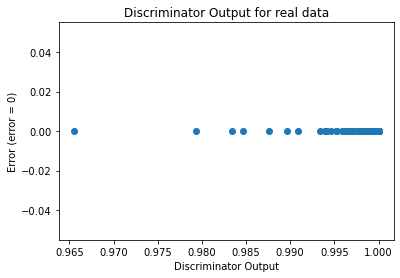

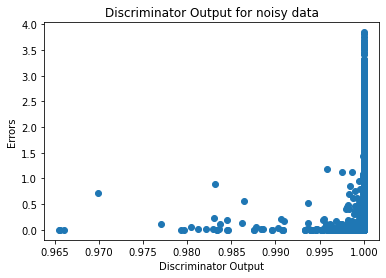

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)